# Week 3a - Data Analytics for Engineers 

*Monday 26th of February 2018* 

## 0. Keeping track of absence + Group Formation + Lab Exercises <> Programmig Lessons

In [62]:
list(range(5))

[0, 1, 2, 3, 4]

In [60]:
len(temp_list_2)

0

In [61]:
temp_list = range(5)
temp_list_2 = []

for item in temp_list: 
    temp_list_2.append(item*2)
    
temp_list_2

[0, 2, 4, 6, 8]

In [78]:
max_threshold = 12
min_threshold = 9
data_frame = pd.DataFrame({"values": [9, 10, 11, 12]})







In [79]:
data_frame

,values
0,9
1,10
2,11
3,12


In [80]:
data_frame.loc[(data_frame['values'] < max_threshold) & (data_frame['values'] > min_threshold)]

,values
1,10
2,11


In [64]:
temp_list = range(5)
temp_list_2 = []

for item in temp_list: 
    print(item*2)
    temp_list_aa = item*2
    
temp_list_aa

0
2
4
6
8


8

In [1]:
# 3 copies A3-size (any printer will do, e.g. Metaforum)
# no presentation required
# takes about 45 minutes
# deadline submitting poster next Monday
# peer review next Wednesday
# group consensus

## 1. Describe Method

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline

# import data
student_grades = pd.read_csv("http://bit.ly/dae_student_grades_predictors")

In [3]:
# without include parameters
student_grades.describe()

,assignment1,assignment2,homework,exam,resit,avg_grade_high_school,hours_spent_studying
count,20.000000,20.000000,20.000000,20.000000,5.000000,20.000000,20.000000
mean,6.510000,6.675000,9.425000,6.160000,4.440000,6.825000,32.900000
std,1.579107,1.582428,0.935766,1.719057,2.081586,0.858931,13.110462
min,3.400000,4.400000,7.000000,2.900000,1.000000,5.500000,11.000000
25%,5.850000,5.300000,9.000000,5.125000,4.100000,6.250000,25.750000
50%,6.550000,6.850000,10.000000,6.050000,5.100000,6.700000,32.000000
75%,7.475000,7.975000,10.000000,7.325000,5.800000,7.300000,38.000000
max,9.000000,9.800000,10.000000,9.200000,6.200000,8.600000,65.000000


In [4]:
# with include parameter
student_grades.describe(include='all')
# what is the difference with the previous one? why is that?

,student,assignment1,assignment2,homework,exam,resit,avg_grade_high_school,hours_spent_studying
count,20,20.000000,20.000000,20.000000,20.000000,5.000000,20.000000,20.000000
unique,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zoë,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.510000,6.675000,9.425000,6.160000,4.440000,6.825000,32.900000
std,NaN,1.579107,1.582428,0.935766,1.719057,2.081586,0.858931,13.110462
min,NaN,3.400000,4.400000,7.000000,2.900000,1.000000,5.500000,11.000000
25%,NaN,5.850000,5.300000,9.000000,5.125000,4.100000,6.250000,25.750000
50%,NaN,6.550000,6.850000,10.000000,6.050000,5.100000,6.700000,32.000000
75%,NaN,7.475000,7.975000,10.000000,7.325000,5.800000,7.300000,38.000000


## 2. Pairwise scatter plots

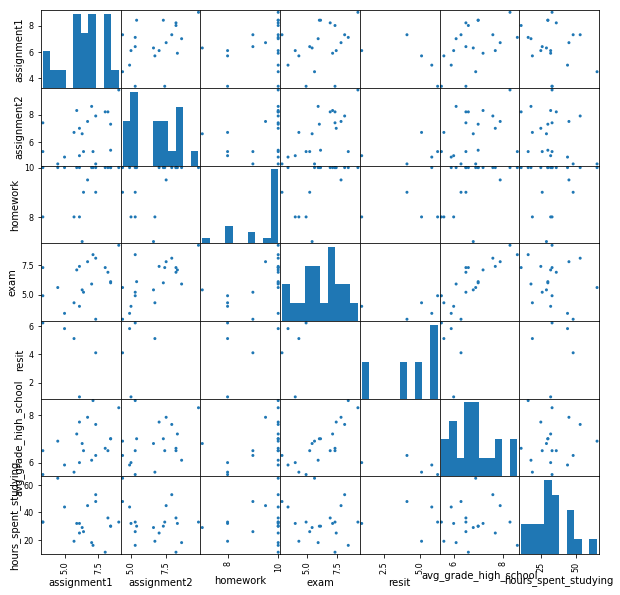

In [5]:
pd.plotting.scatter_matrix(student_grades, alpha=1, figsize=(10,10));
# 1. what is the effect of changing alpha? 
# 2. how do you change diagonal from histograms to kernel density plots? why would you do that?

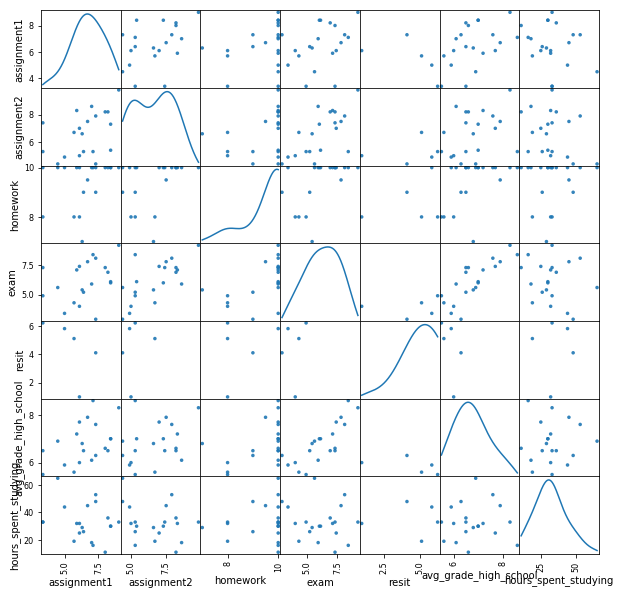

In [6]:
# diagonal consisting of kernel density plots
pd.plotting.scatter_matrix(student_grades, alpha=0.9, figsize=(10,10), diagonal='kde', s=50);
# does the shape of the distribution make sense for each of the variables? 

## 3. Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression  
# sklearn is a popular Python machine learning library of which we want to use the LinearRegression function
# (in the programming lessons it is already included by default)

In [8]:
# between what variables can we expect a (linear) relationship?
student_grades.columns # check the pairwise scatter plot!

Index(['student', 'assignment1', 'assignment2', 'homework', 'exam', 'resit',
       'avg_grade_high_school', 'hours_spent_studying'],
      dtype='object')

In [9]:
# independent variable (X) and dependent variable (y)
X = student_grades[['avg_grade_high_school']]
y = student_grades[['exam']]
# why do we typically use a capital letter "X" but a lower case "y"?
# could we also use single brackets for X?

In [10]:
type(student_grades['avg_grade_high_school']) == type(student_grades[['avg_grade_high_school']])
# what will be the output (False or True)? (pandas Series != pandas DataFrame)

False

In [11]:
# fitting a linear model
regr = LinearRegression()
regr.fit(X, y)

intercept = regr.intercept_ # y-value if coefficient is 0
coef = regr.coef_ # the slope of the line

print(intercept, coef)

# does the direction of the intercept make sense? 

[-4.9070412] [[ 1.6215445]]


In [12]:
# will someone who passed high school with an average grade of 6 also pass this course?

In [13]:
avg_grade_high_school = 6 # (given)
expected_grade = intercept + avg_grade_high_school * coef
print(expected_grade)

[[ 4.82222579]]


In [14]:
# shorter using the predict function
regr.predict(avg_grade_high_school)

array([[ 4.82222579]])

In [15]:
# what critical assumption did we make to draw this conclusion? 

In [16]:
# determine R^2
R2 = regr.score(X, y)
print(R2)

# always between 0 and 1
# how much of the difference in outcome is explained by the model
# lower R^2 indicates the model has more error
# there is not such a thing as a minimum cut-off value for R^2 (depends on your objective!)
# can be used, however, to compare model fit

0.656438456194


In [17]:
# do you think 65.6% is a lot in this case? 
# what could be a corresponding managerial decision based on this (fictitious) finding? 

Additional read / watch  
* [YouTube](https://www.youtube.com/watch?v=lZtyxpHsBlg) ($R^2$ in layman terms)
* [Article](http://blog.minitab.com/blog/adventures-in-statistics-2/how-high-should-r-squared-be-in-regression-analysis) (How High Should R-squared be in Regression Analysis - also have a look at the comments!)

In [18]:
# how could we potentially improve the model?

In [19]:
# both average grade higih school and assignment grades as independent variables
X_mlr = student_grades[['avg_grade_high_school', 'assignment1', 'assignment2']]
y_mlr = student_grades[['exam']]

regr_mlr = LinearRegression()
regr_mlr.fit(X_mlr, y_mlr)
R2_mlr = regr_mlr.score(X_mlr, y_mlr)

print(R2_mlr) # is this a better model than the previous one?

0.883012103291


In [20]:
# complexity trade-off
X_mlr2 = student_grades[['avg_grade_high_school', 'assignment1']]
y_mlr2 = student_grades[['exam']]

regr_mlr2 = LinearRegression()
regr_mlr2.fit(X_mlr2, y_mlr2)
R2_mlr2 = regr_mlr2.score(X_mlr2, y_mlr2)

print(R2_mlr2)

0.657089213479


## 3. Interaction (cross term) and Quadratic term

In [21]:
# conceptual description of cross terms for categorical variables
from IPython.display import HTML # to view iframes (e.g. a YouTube video) in the Jupyter Notebook

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vZUtDJbzFRQ" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

If you are looking at this Jupyter Notebook on Github go to [this](https://www.youtube.com/watch?v=vZUtDJbzFRQ) page instead. 

In [22]:
# adding a cross term to your dataset
student_grades['assignment1 x assignment2'] = student_grades['assignment1'] * student_grades['assignment2']

In [23]:
# check new column
student_grades[['assignment1', 'assignment2', 'assignment1 x assignment2']].head()

,assignment1,assignment2,assignment1 x assignment2
0,6.7,7.5,50.25
1,8.2,8.2,67.24
2,9.0,9.8,88.20
3,5.0,4.9,24.50
4,3.4,5.3,18.02


In [24]:
# same idea for quadratic terms
student_grades['assignment2^2'] = student_grades['assignment2'] ** 2

In [25]:
# how to determine whether to include a quadratic term? 

**First-order relationship**
![first-order](img/first_order.png)

**Second-order (quadratic) relationship**
![second-order](img/second_order.png)

# 4. Clustering

In [26]:
# can you give an use case of clustering?
from sklearn.cluster import KMeans  

X = student_grades[['avg_grade_high_school', 'exam']]
km = KMeans(n_clusters=3) # how to choose n_clusters?
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
student_grades[['avg_grade_high_school', 'exam']].head()

,avg_grade_high_school,exam
0,7.9,7.8
1,6.5,6.9
2,8.3,9.2
3,5.9,3.4
4,5.5,4.9


In [28]:
# cluster for each of the records
km.labels_

array([0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0], dtype=int32)

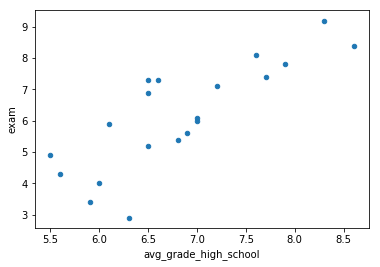

In [29]:
# plot data points
student_grades.plot(kind='scatter', x='avg_grade_high_school', y='exam');

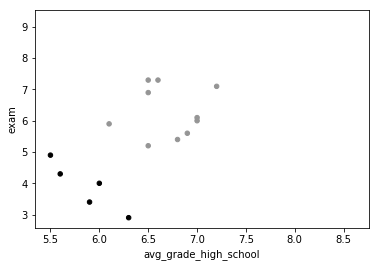

In [30]:
# plot data points with label colors
student_grades.plot(kind='scatter', x='avg_grade_high_school', y='exam', c=km.labels_);

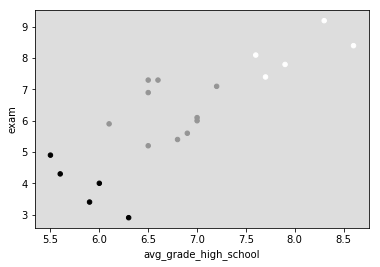

In [31]:
# we cannot see the white dots! change the background color:
ax = plt.gca()
ax.set_facecolor('#dddddd') # grey color
student_grades.plot(kind='scatter', x='avg_grade_high_school', y='exam', c=km.labels_, ax=ax);

In [32]:
# coordinates of cluster centroids 
print(km.cluster_centers_)

[[ 8.02  8.18]
 [ 6.71  6.28]
 [ 5.86  3.9 ]]


In [33]:
# convert centers to dataframe
centers = pd.DataFrame(km.cluster_centers_, columns=['avg_grade_high_school', 'exam'])
centers

,avg_grade_high_school,exam
0,8.02,8.18
1,6.71,6.28
2,5.86,3.90


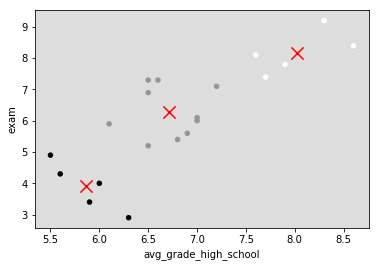

In [34]:
# plot data points and centroids
ax = plt.gca()
ax.set_facecolor('#dddddd') # grey color
student_grades.plot(kind='scatter', x='avg_grade_high_school', y='exam', c=km.labels_, ax=ax);
centers.plot(kind='scatter', x='avg_grade_high_school', y='exam', marker='x', s=150, c='red', ax=ax);

In [35]:
# total within cluster distance?
print(km.inertia_)
# does this figure seems plausible to you?
# how does this figure change if you increase the number of clusters?

12.153


In [36]:
# say that someone got an average high school grade of 7.4 and an exam grade of 7.5. 
# To which cluster will this new point belong?
X_test = pd.DataFrame([[7.4, 7.5]], columns=['avg_grade_high_school', 'exam'])
X_test

,avg_grade_high_school,exam
0,7.4,7.5


In [37]:
km.predict(X_test) # so is that the white, gray or black cluster?

array([0], dtype=int32)

In [38]:
# BONUS-QUESTION: Would scaling be necessary in this case? Why?

## 5. Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier  

X_dtc = student_grades[['assignment1', 'assignment2', 'homework', 'avg_grade_high_school', 'hours_spent_studying']]
y_dtc = student_grades['exam']
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X_dtc, y_dtc) # why do we get an error? 

ValueError: Unknown label type: 'continuous'

In [40]:
# create new column to indicate whether the student passed the course the first time
student_grades.loc[student_grades.resit.isnull(), 'pass_first_attempt'] = True
student_grades.loc[~student_grades.resit.isnull(), 'pass_first_attempt'] = False

In [41]:
# what is the problem with this model? 
X_dtc = student_grades[['assignment1', 'assignment2', 'homework', 'exam']]
y_dtc = student_grades['pass_first_attempt']
dtc = DecisionTreeClassifier()
dtc.fit(X_dtc, y_dtc);

In [42]:
# make predictions using 
y_pred = dtc.predict(X_dtc)

In [43]:
# determine accuracy of model (how many of the predicted labels were actually correct?)
from sklearn.metrics import accuracy_score
accuracy_score(y_dtc, y_pred)

1.0

In [44]:
# how could we rephrase the problem statement? 

In [45]:
X_dtc = student_grades[['avg_grade_high_school', 'hours_spent_studying']]
y_dtc = student_grades['pass_first_attempt']
dtc = DecisionTreeClassifier(max_depth=1) # also known as decision trump
dtc.fit(X_dtc, y_dtc);

In [46]:
# which of the two independent variables is more important? 
dtc.feature_importances_

array([ 1.,  0.])

In [47]:
# make predictions and determine model's accuracy
y_pred = dtc.predict(X_dtc)
accuracy_score(y_dtc, y_pred)

0.94999999999999996

In [48]:
# what type of mistake did the model make? (false positive or false negatives)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_dtc, y_pred) # first true values, then predicted values!

# what is the advantage of the confusion matrix compared to the accuracy matrix?

array([[ 5,  0],
       [ 1, 14]])

![confusion-matrix](img/confusion_matrix.jpg)

In [49]:
# precision - how useful are the results? =  TP/(TP+FP)
# recall - how complete are the results? = TP/(TP+FN)

Please note that the predicted/actual and true/false labels are package dependent! [Google for confusion matrix](http://lmgtfy.com/?q=confusion+matrix) and you find a ton of variations!

For sklearn's interpretation of TN/FP/FN/TP see [this](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) page.

## Where can I find these Jupyter Notebooks? 
https://github.com/RoyKlaasseBos/Data-Analytics-for-Engineers

## What am I supposed to do now? 

In [50]:
# 1. Theory Exercises DMM (Homework)
# 2. Programming Exercises DMM (Homework)
# 3. Lab Exercises DMM 
# 4. Graded Assignment 1 Module 3 (and 2..)

# or have a look at the YouTube videos posted on AllAnswers